In [1]:
import nltk
import re
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import  accuracy_score

In [6]:
train_dataset= pd.read_csv('/train_data.txt',sep=':::' , names =['ID','TITLE','GENRE','DESCRIPTION'],engine='python')

In [7]:
train_dataset = train_dataset.set_index('ID')

In [8]:
train_dataset.head()

,TITLE,GENRE,DESCRIPTION
ID,,,
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [9]:
train_dataset.duplicated()

,0
ID,
1,False
2,False
3,False
4,False
5,False
...,...
54210,False
54211,False
54212,False


In [10]:
train_dataset.isnull().sum()

,0
TITLE,0
GENRE,0
DESCRIPTION,0


In [11]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TITLE        54214 non-null  object
 1   GENRE        54214 non-null  object
 2   DESCRIPTION  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [12]:
train_dataset.describe()

,TITLE,GENRE,DESCRIPTION
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [13]:
test_dataset = pd.read_csv('/test_data.txt',sep=':::',names=['ID','TITLE','DESCRIPTION'],engine='python')

In [14]:
test_dataset = test_dataset.set_index('ID')

In [15]:
test_dataset.head()

,TITLE,DESCRIPTION
ID,,
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...


In [16]:
test_dataset.duplicated()

,0
ID,
1,False
2,False
3,False
4,False
5,False
...,...
54196,False
54197,False
54198,False


In [17]:
test_dataset.isnull().sum()

,0
TITLE,0
DESCRIPTION,0


In [18]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54200 entries, 1 to 54200
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TITLE        54200 non-null  object
 1   DESCRIPTION  54200 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [19]:
test_dataset.describe()

,TITLE,DESCRIPTION
count,54200,54200
unique,54200,54072
top,Edgar's Lunch (1998),Grammy - music award of the American academy ...
freq,1,10


In [20]:
genre_counts = train_dataset["GENRE"].value_counts()

In [21]:
genre_df = pd.DataFrame({
    'GENRE': genre_counts.index,
    'Number of Movies': genre_counts.values
})

<ipython-input-22-d3cd15b39265>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=genre_df, x='Number of Movies', y='GENRE', palette='coolwarm',ci=None,legend=False)
<ipython-input-22-d3cd15b39265>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_df, x='Number of Movies', y='GENRE', palette='coolwarm',ci=None,legend=False)


Text(0.5, 1.0, 'GENRE Distripution')

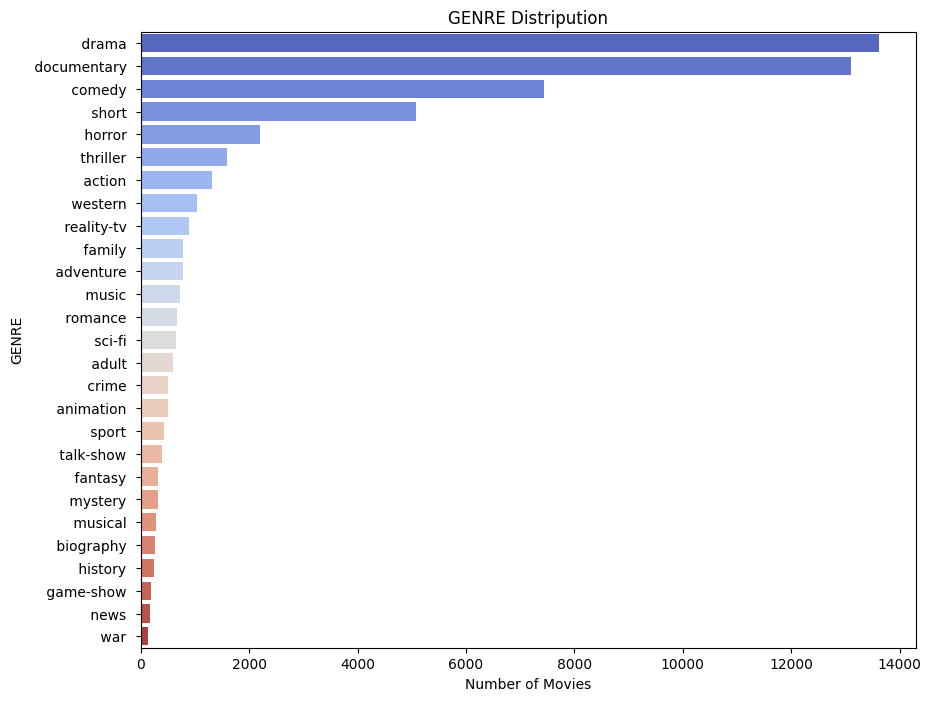

In [22]:
plt.figure(figsize=(10,8))
sns.barplot(data=genre_df, x='Number of Movies', y='GENRE', palette='coolwarm',ci=None,legend=False)
plt.title("GENRE Distripution")

In [28]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [29]:
def preprocess_text(text: str) -> str:
    text = text.lower()
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in words if word not in stop_words and len(word) > 2)
    return text

train_dataset['clean_description'] = train_dataset['DESCRIPTION'].apply(preprocess_text)
test_dataset['clean_description'] = test_dataset['DESCRIPTION'].apply(preprocess_text)


In [30]:
vector=TfidfVectorizer()
X_train=vector.fit_transform(train_dataset['clean_description'])
X_test=vector.transform(test_dataset['clean_description'])

In [31]:
X=X_train
y= train_dataset.iloc[:,1].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [32]:
SVC_classifier = SVC()
SVC_classifier.fit(X_train,y_train)

SVC()

In [45]:
train_dataset

,TITLE,GENRE,DESCRIPTION,clean_description
ID,,,,
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refers recovered bodies ground zero...
...,...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...,short lived nbc live sitcom centered bonino wo...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...,next generation exploitation sisters kapa bay ...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g...",bestaan echt stand comedy growing facing fears...


In [46]:
input_vector = vector.transform(['listening conversation doctor parents year old'])


In [47]:
SVC_classifier.predict(input_vector)

array([' drama '], dtype=object)

In [50]:
SVC_classifier.score(X_train, y_train)

0.9032994397177838

In [48]:
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [51]:
log_reg.predict(input_vector)

array([' drama '], dtype=object)

In [52]:
log_reg.score(X_train, y_train)

0.6998916326577667

In [54]:
y_pred = SVC_classifier.predict(X_test)

In [55]:
accuracy = accuracy_score(y_test, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.5730886286083188


In [56]:
y_pred1 = log_reg.predict(X_test)

In [57]:
accuracy = accuracy_score(y_test, y_pred1)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.5841556764733008
